# Pre-Processing (Pre-Processing ini kemungkinan dapat berubah untuk mencari best model)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

In [6]:
%cd /content/drive/My Drive/Rakamin FinPro/

[WinError 3] The system cannot find the path specified: '/content/drive/My Drive/Rakamin FinPro/'
C:\Users\LENOVO\Documents\RAKAMIN\Final Project\Stage 2 - Preprocessing


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("SBAnational.csv", parse_dates=['ApprovalDate', 'DisbursementDate'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

### Mengatasi ApprovalFY yang memiliki nilai string

In [10]:
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [11]:
def change_year(x):
    if x['ApprovalFY'] == '1976A':
        return 1976
    else:
        return int(x['ApprovalFY'])
    
df['ApprovalFY'] = df.apply(change_year,axis=1)

In [12]:
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971], dtype=int64)

### Mengatasi DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv yang memiliki tanda '$' dan ','

In [13]:
def remove_sign(item):
        new = item.replace('$','')
        new2 = new.replace(' ','')
        new3 = new2.replace(',','')
        return float(new3)

df['DisbursementGross'] = df['DisbursementGross'].apply(lambda x : remove_sign(x))
df['BalanceGross'] = df['BalanceGross'].apply(lambda x : remove_sign(x))
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(lambda x : remove_sign(x))
df['GrAppv'] = df['GrAppv'].apply(lambda x : remove_sign(x))
df['SBA_Appv'] = df['SBA_Appv'].apply(lambda x : remove_sign(x))

In [14]:
dfc_v1 = df.copy()

# 1. Data Cleansing

## A. Handle Missing Values, Undefined Values & Change to Numeric Values

In [15]:
# Check column with missing values
dfc_v1.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Handle missing values MIS_Status & Change to Numeric Values

In [16]:
 # Mengatasi missing value pada column MIS_Status
dfc_v1['MIS_Status'] = np.where(dfc_v1['ChgOffPrinGr'] == 0, 'P I F', 'CHGOFF')

# ubah values target menjadi numeric agar bisa dilihat korelasinya terhadap feature target
dfc_v1['MIS_Status'] = np.where(dfc_v1['MIS_Status'] == 'CHGOFF', 1, 0)

In [17]:
dfc_v1['MIS_Status'].value_counts()

0    737152
1    162012
Name: MIS_Status, dtype: int64

#### Mengambil 2 digit pertama dari kolom NAICS dan menghilangkan value 0

In [18]:
# Mengambil 2 digit pertama
naics = []
for item in dfc_v1['NAICS']:
    if item == 0 :
        naics.append(0)
    else :
        a = list(str(item))[:2]
        b = ''.join(a)
        naics.append(b)

dfc_v1['NAICS'] = naics


# Drop 0
index_naics = []
for item in list(dfc_v1[dfc_v1['NAICS'] == 0].index):
    index_naics.append(item)

dfc_v1.drop(index_naics,inplace=True)

In [19]:
# Mengganti 2 digit dari NAICS menjadi nama sektor industri terkait
dfc_v1['NAICS'] = dfc_v1['NAICS'].map({
    '11': 'Agriculture / Forestry / Fishing / Hunting',
    '21': 'Mining / Quarrying / Oil&Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation / Warehousing',
    '49': 'Transportation / Warehousing',
    '51': 'Information',
    '52': 'Finance / Insurance',
    '53': 'Real Estate / Rental / Leasing',
    '54': 'Proffesional / Scientific / Tech.Service',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative & Support / Waste Management / Remediation Services',
    '61': 'Educational',
    '62': 'Health Care / Social Assistance',
    '71': 'Arts / Entertainment / Recreation',
    '72': 'Accomodation / Food Services',
    '81': 'Other Services (except public admin)',
    '92': 'Public Administration'
})

In [20]:
dfc_v1['NAICS'].value_counts()

Retail trade                                                          127251
Other Services (except public admin)                                   72618
Proffesional / Scientific / Tech.Service                               68170
Manufacturing                                                          68029
Accomodation / Food Services                                           67600
Construction                                                           66646
Health Care / Social Assistance                                        55366
Wholesale trade                                                        48743
Administrative & Support / Waste Management / Remediation Services     32685
Transportation / Warehousing                                           22531
Arts / Entertainment / Recreation                                      14640
Real Estate / Rental / Leasing                                         13632
Information                                                            11379

#### Handle value selain 'Y' or 'N' pada column LowDoc, karena tidak terdefinisi dan mengubahnya menjadi numerik

In [21]:
dfc_v1['LowDoc'].value_counts()

N    624881
Y     67275
0       683
C       619
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [22]:
index_drop_lowdoc = []
for index in list(dfc_v1[(dfc_v1['LowDoc'] != 'N') & (dfc_v1['LowDoc'] != 'Y')].index):
    index_drop_lowdoc.append(index)

dfc_v1.drop(index_drop_lowdoc,inplace=True)

# -- change LowDoc ('Y' = 1, 'N' = 0)
def change_lowdoc(x):
    if x == 'N':
        return 0
    else :
        return 1

dfc_v1['LowDoc'] = dfc_v1['LowDoc'].apply(lambda x: change_lowdoc(x))

In [23]:
dfc_v1['LowDoc'].value_counts()

0    624881
1     67275
Name: LowDoc, dtype: int64

#### Mengatasi column Term, NoEmp, NewExist, UrbanRural, DisbursementGross yang memiliki nilai 0

In [24]:
# Mengatasi column Term, NoEmp, NewExist, UrbanRural, DisbursementGross yang memiliki nilai 0

# Term
term = []
for item in list(dfc_v1[dfc_v1['Term'] == 0].index):
    term.append(item)

dfc_v1.drop(term,inplace=True)

# NoEmp
noemp = []
for item in list(dfc_v1[dfc_v1['NoEmp'] == 0].index):
    noemp.append(item)

dfc_v1.drop(noemp,inplace=True)

# NewExist
newexist = []
for item in list(dfc_v1[dfc_v1['NewExist'] == 0].index):
    newexist.append(item)

dfc_v1.drop(newexist,inplace=True)

# Mengubah value NewExist
def change_newexist(x):
    # Value 1 akan diubah menjadi 1 (Existing business)
    if x == 1:
        return 1
    # Value 2 akan diubah menjadi 0 (New business)
    else:
        return 0
dfc_v1['NewExist'] = dfc_v1['NewExist'].apply(lambda x : change_newexist(x))

# UrbanRural
urbanrural = []
for item in list(dfc_v1[dfc_v1['UrbanRural'] == 0].index):
    urbanrural.append(item)

dfc_v1.drop(urbanrural,inplace=True)

# Change UrbanRural
def change_urbanrural(x):
    if x == 1:
        return 1
    else:
        return 0
dfc_v1['UrbanRural'] = dfc_v1['UrbanRural'].apply(lambda x : change_urbanrural(x))

# DisbursementGross
dg = []
for item in list(dfc_v1[dfc_v1['DisbursementGross'] == 0].index):
    dg.append(item)

dfc_v1.drop(dg,inplace=True)

In [25]:
dfc_v1['UrbanRural'].value_counts()

1    442242
0     99377
Name: UrbanRural, dtype: int64

In [26]:
dfc_v1['NewExist'].value_counts()

1    390147
0    151472
Name: NewExist, dtype: int64

#### Handle Column FranchiseCode

In [27]:
# Mengubah value FranchiseCode
def change_franchise(x):
    # Value 1 atau 0 akan diubah menjadi 0 (No Franchise)
    if (x == 1) | (x == 0):
        return 0
    # Value selain dari 1 atau 0 akan diubah menjadi 1 (Have Franchise)
    else :
        return 1

dfc_v1['FranchiseCode'] = dfc_v1['FranchiseCode'].apply(lambda x: change_franchise(x))

In [28]:
dfc_v1['FranchiseCode'].value_counts()

0    512359
1     29260
Name: FranchiseCode, dtype: int64

In [29]:
# Check column with missing values
dfc_v1.isnull().sum()

LoanNr_ChkDgt             0
Name                      7
City                      0
State                     0
Zip                       0
Bank                     12
BankState                12
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr               540
LowDoc                    0
ChgOffDate           409266
DisbursementDate       1774
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [30]:
dfc_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541619 entries, 12 to 898660
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      541619 non-null  int64         
 1   Name               541612 non-null  object        
 2   City               541619 non-null  object        
 3   State              541619 non-null  object        
 4   Zip                541619 non-null  int64         
 5   Bank               541607 non-null  object        
 6   BankState          541607 non-null  object        
 7   NAICS              541619 non-null  object        
 8   ApprovalDate       541619 non-null  datetime64[ns]
 9   ApprovalFY         541619 non-null  int64         
 10  Term               541619 non-null  int64         
 11  NoEmp              541619 non-null  int64         
 12  NewExist           541619 non-null  int64         
 13  CreateJob          541619 non-null  int64  

## B. Handle Duplicated Data

In [31]:
dfc_v1.duplicated().sum()

0

> Tidak ada data yang duplicated, sehingga tidak perlu melakukan apapun

## C. Handle Outliers

### Cek distribusi NoEmp

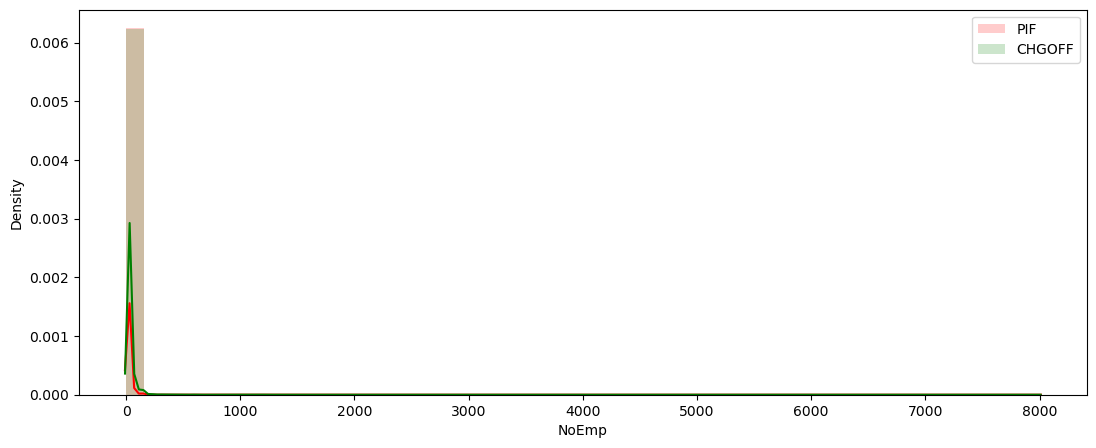

In [32]:
plt.figure(figsize=(13,5))
sns.distplot(dfc_v1[dfc_v1['MIS_Status'] == 1]['NoEmp'],hist_kws=dict(alpha=0.2),color='red',label='PIF')
sns.distplot(dfc_v1[dfc_v1['MIS_Status'] == 0]['NoEmp'],hist_kws=dict(alpha=0.2),color='green',label='CHGOFF')
plt.legend()

In [33]:
# Mengatasi outliers di NoEmp, karena jumlah maksimal NoEmp diantara 250 - 1500
dfc_v1 = dfc_v1[dfc_v1['NoEmp'] <= 1500]

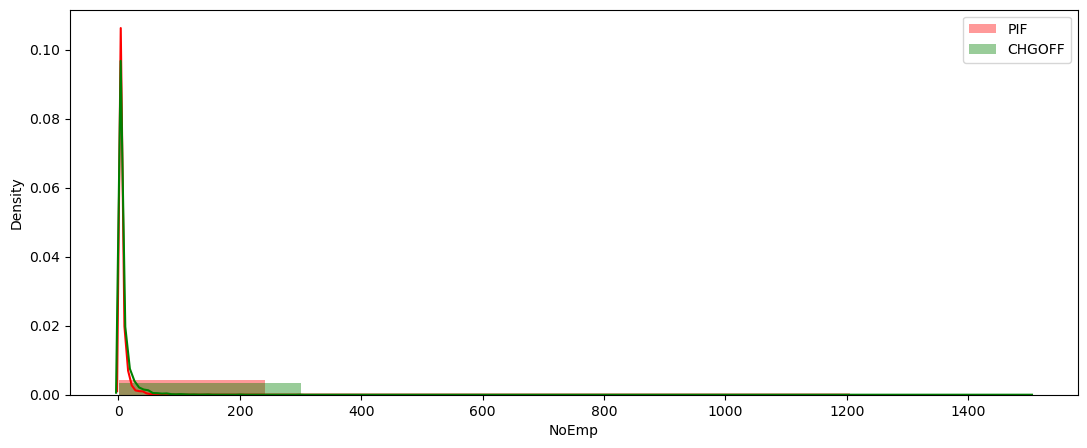

In [34]:
# Try the distribution without outlier

plt.figure(figsize=(13,5))
sns.distplot(dfc_v1[(dfc_v1['NoEmp'] <= 1500) & (dfc_v1['MIS_Status'] == 1)]['NoEmp'],hist_kws=dict(),color='red',label='PIF',bins=5)
sns.distplot(dfc_v1[(dfc_v1['NoEmp'] <= 1500) & (dfc_v1['MIS_Status'] == 0)]['NoEmp'],hist_kws=dict(),color='green',label='CHGOFF',bins=5)
plt.legend()

In [35]:
# Mengatasi outliers di DisbursementGross, menggunakan data yang value DisbursementGross < GrAppv & DisbursementGross == GrAppv
dfc_v1 = dfc_v1[dfc_v1['DisbursementGross'] <= dfc_v1['GrAppv']]

## D. Feature Transformation

In [44]:
# -- import csv that contain state name
states = pd.read_csv('states.csv')
states.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [45]:
def apply_name_states(x) :
    return states[states['Code'] == x['State']]['State'].values[0]

dfc_v1['StateName'] = dfc_v1.apply(apply_name_states,axis=1)

In [46]:
dfc_v1.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,...,StateName_Tennessee,StateName_Texas,StateName_Utah,StateName_Vermont,StateName_Virginia,StateName_Washington,StateName_West Virginia,StateName_Wisconsin,StateName_Wyoming,StateName
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,2006,162,...,0,0,0,0,0,0,0,0,0,North Carolina
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,2006,126,...,0,0,0,0,0,0,0,0,0,Arkansas
32,1000526006,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,2006-02-07,2006,60,...,0,0,0,0,0,0,0,0,0,Louisiana
38,1000576010,CORBIN CREEK GREENHOUSE,SPRINGFIELD,TN,37172,BBCN BANK,CA,2006-02-07,2006,84,...,1,0,0,0,0,0,0,0,0,Tennessee
49,1000686008,SIMCO PRE-OWNED AUTO BROKERS,WINSOR MILL,MD,21244,BBCN BANK,CA,2006-02-07,2006,84,...,0,0,0,0,0,0,0,0,0,Maryland


### Before Log

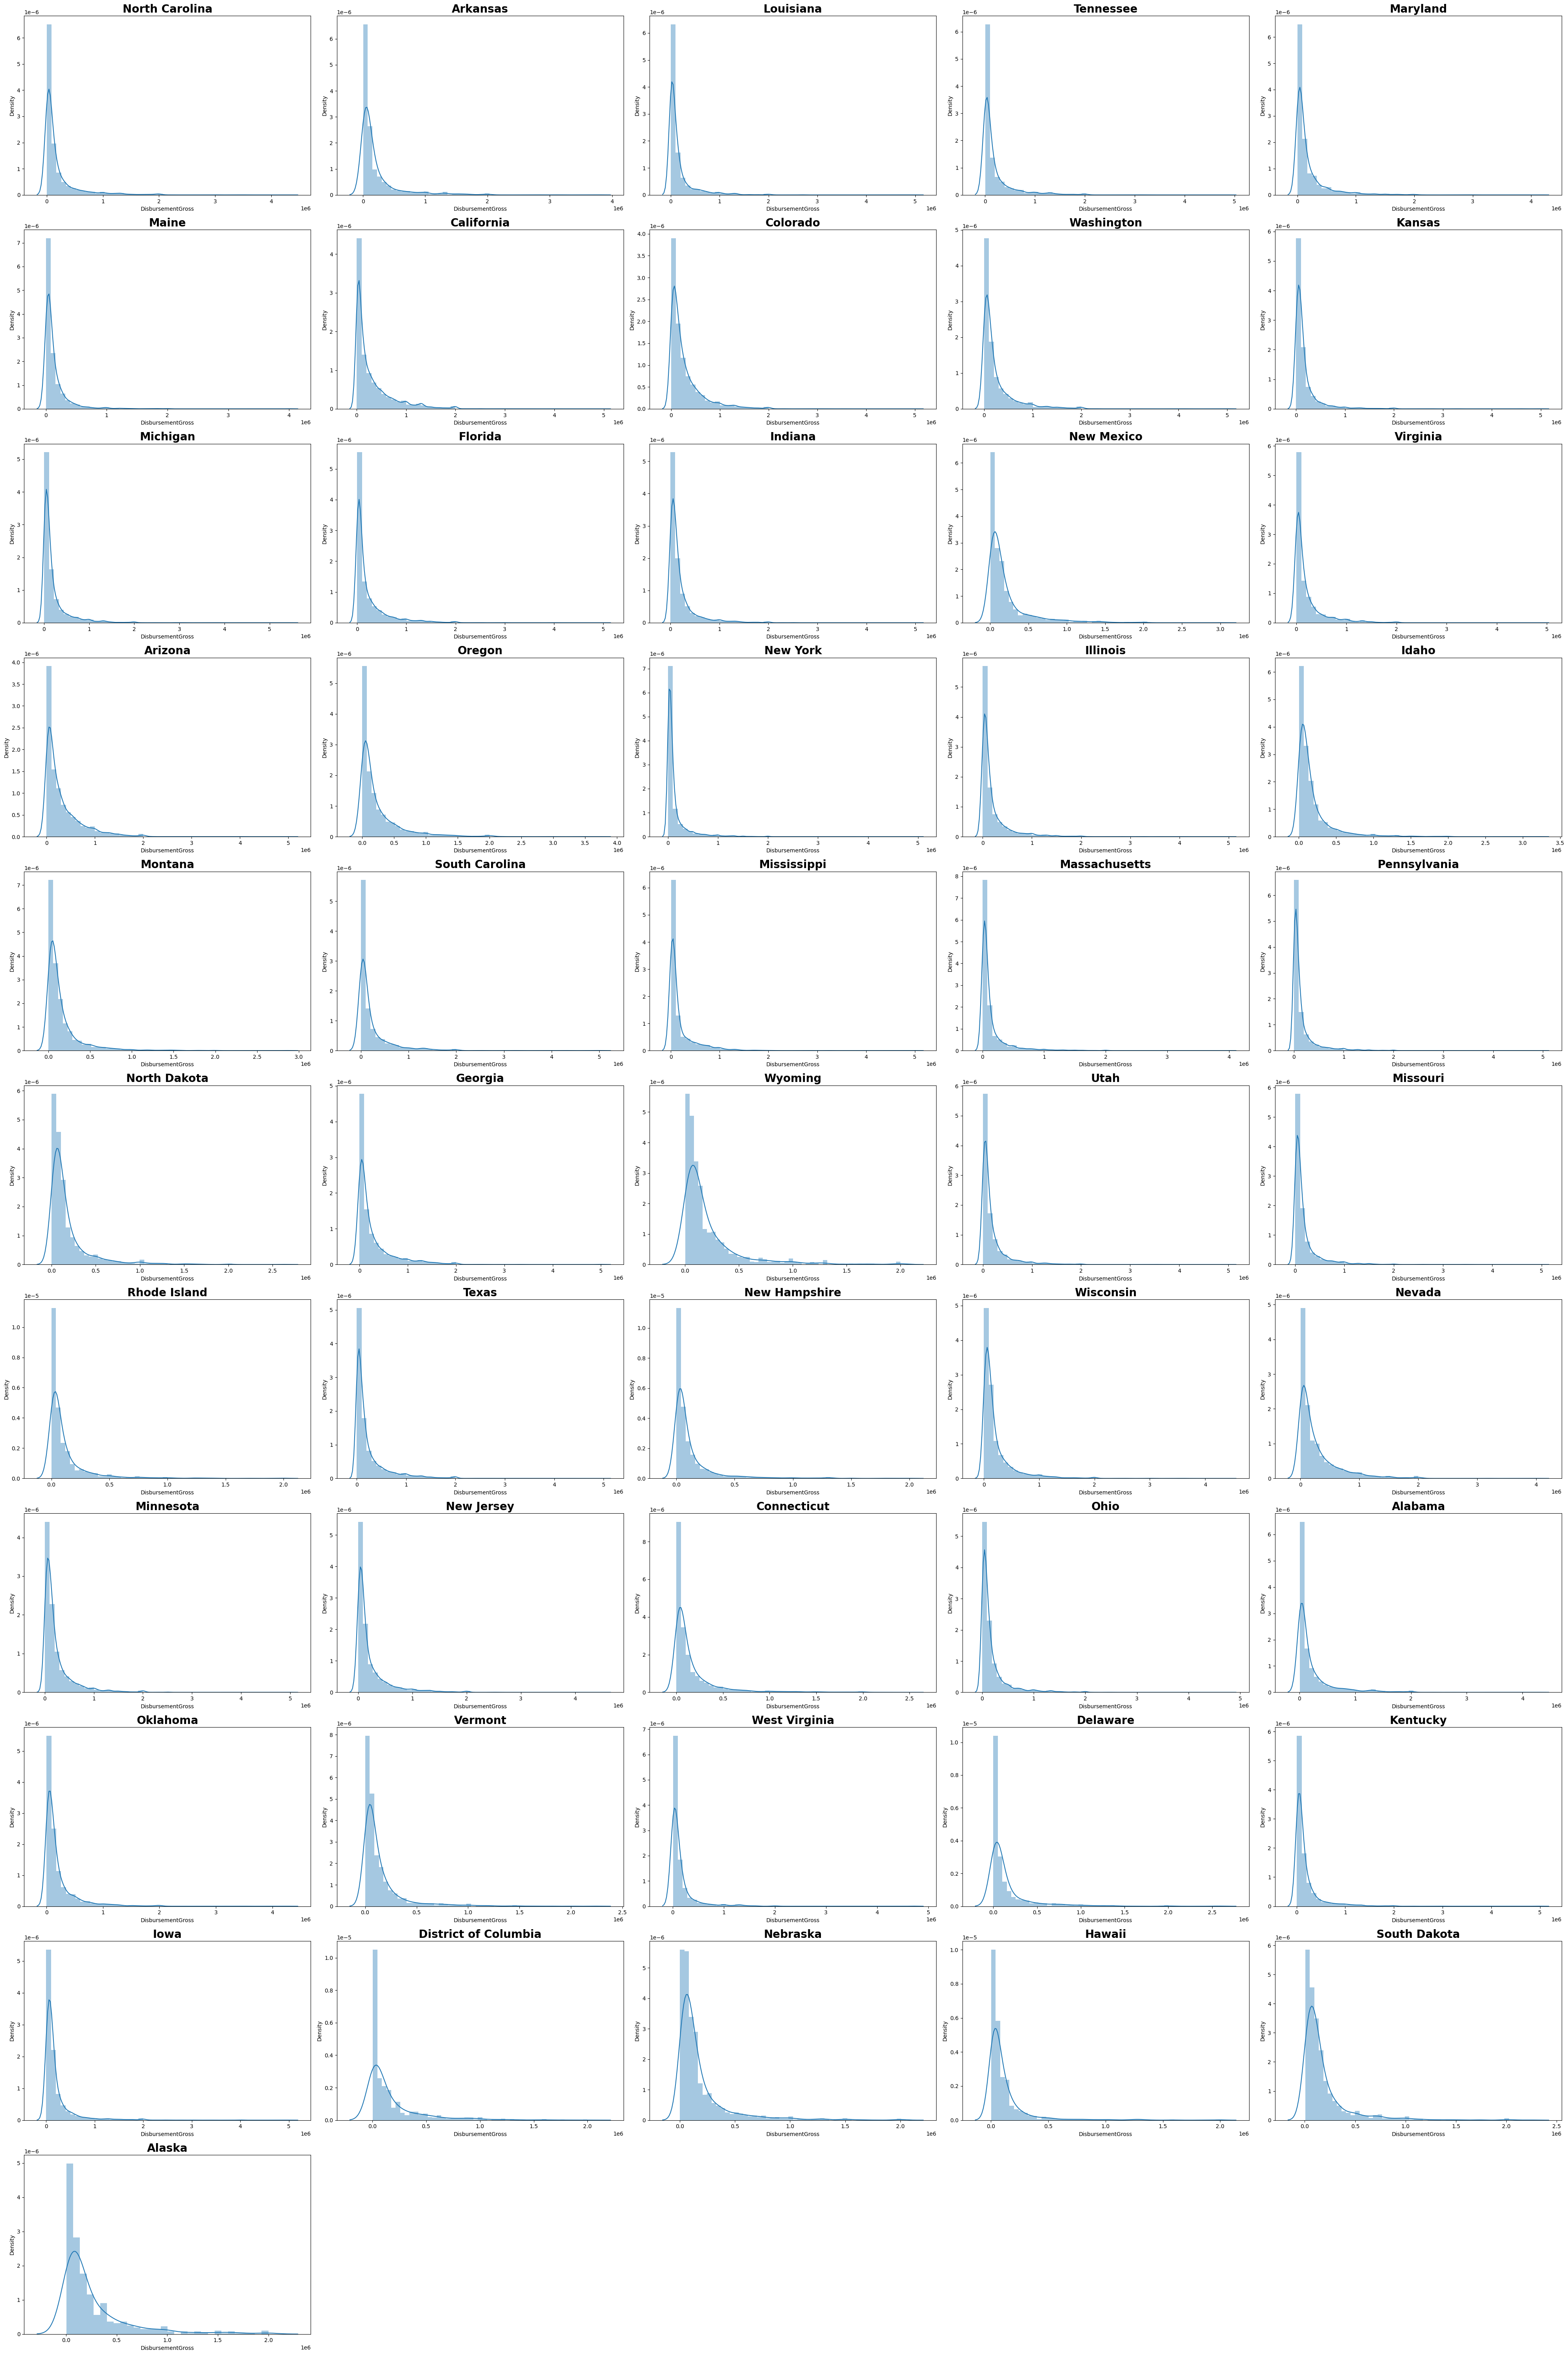

In [47]:
state_unique = list(dfc_v1['State'].unique())
plt.figure(figsize=(40,60))
i = 1
for item in state_unique :
    subs = dfc_v1[dfc_v1['State'] == item]['DisbursementGross']
    plt.subplot(11,5,i)
    sns.distplot(subs) 
    plt.title(list(dfc_v1[dfc_v1['State'] == item]['StateName'])[0],fontweight='bold',fontsize=20) 
    i += 1 
plt.tight_layout()

### After Log

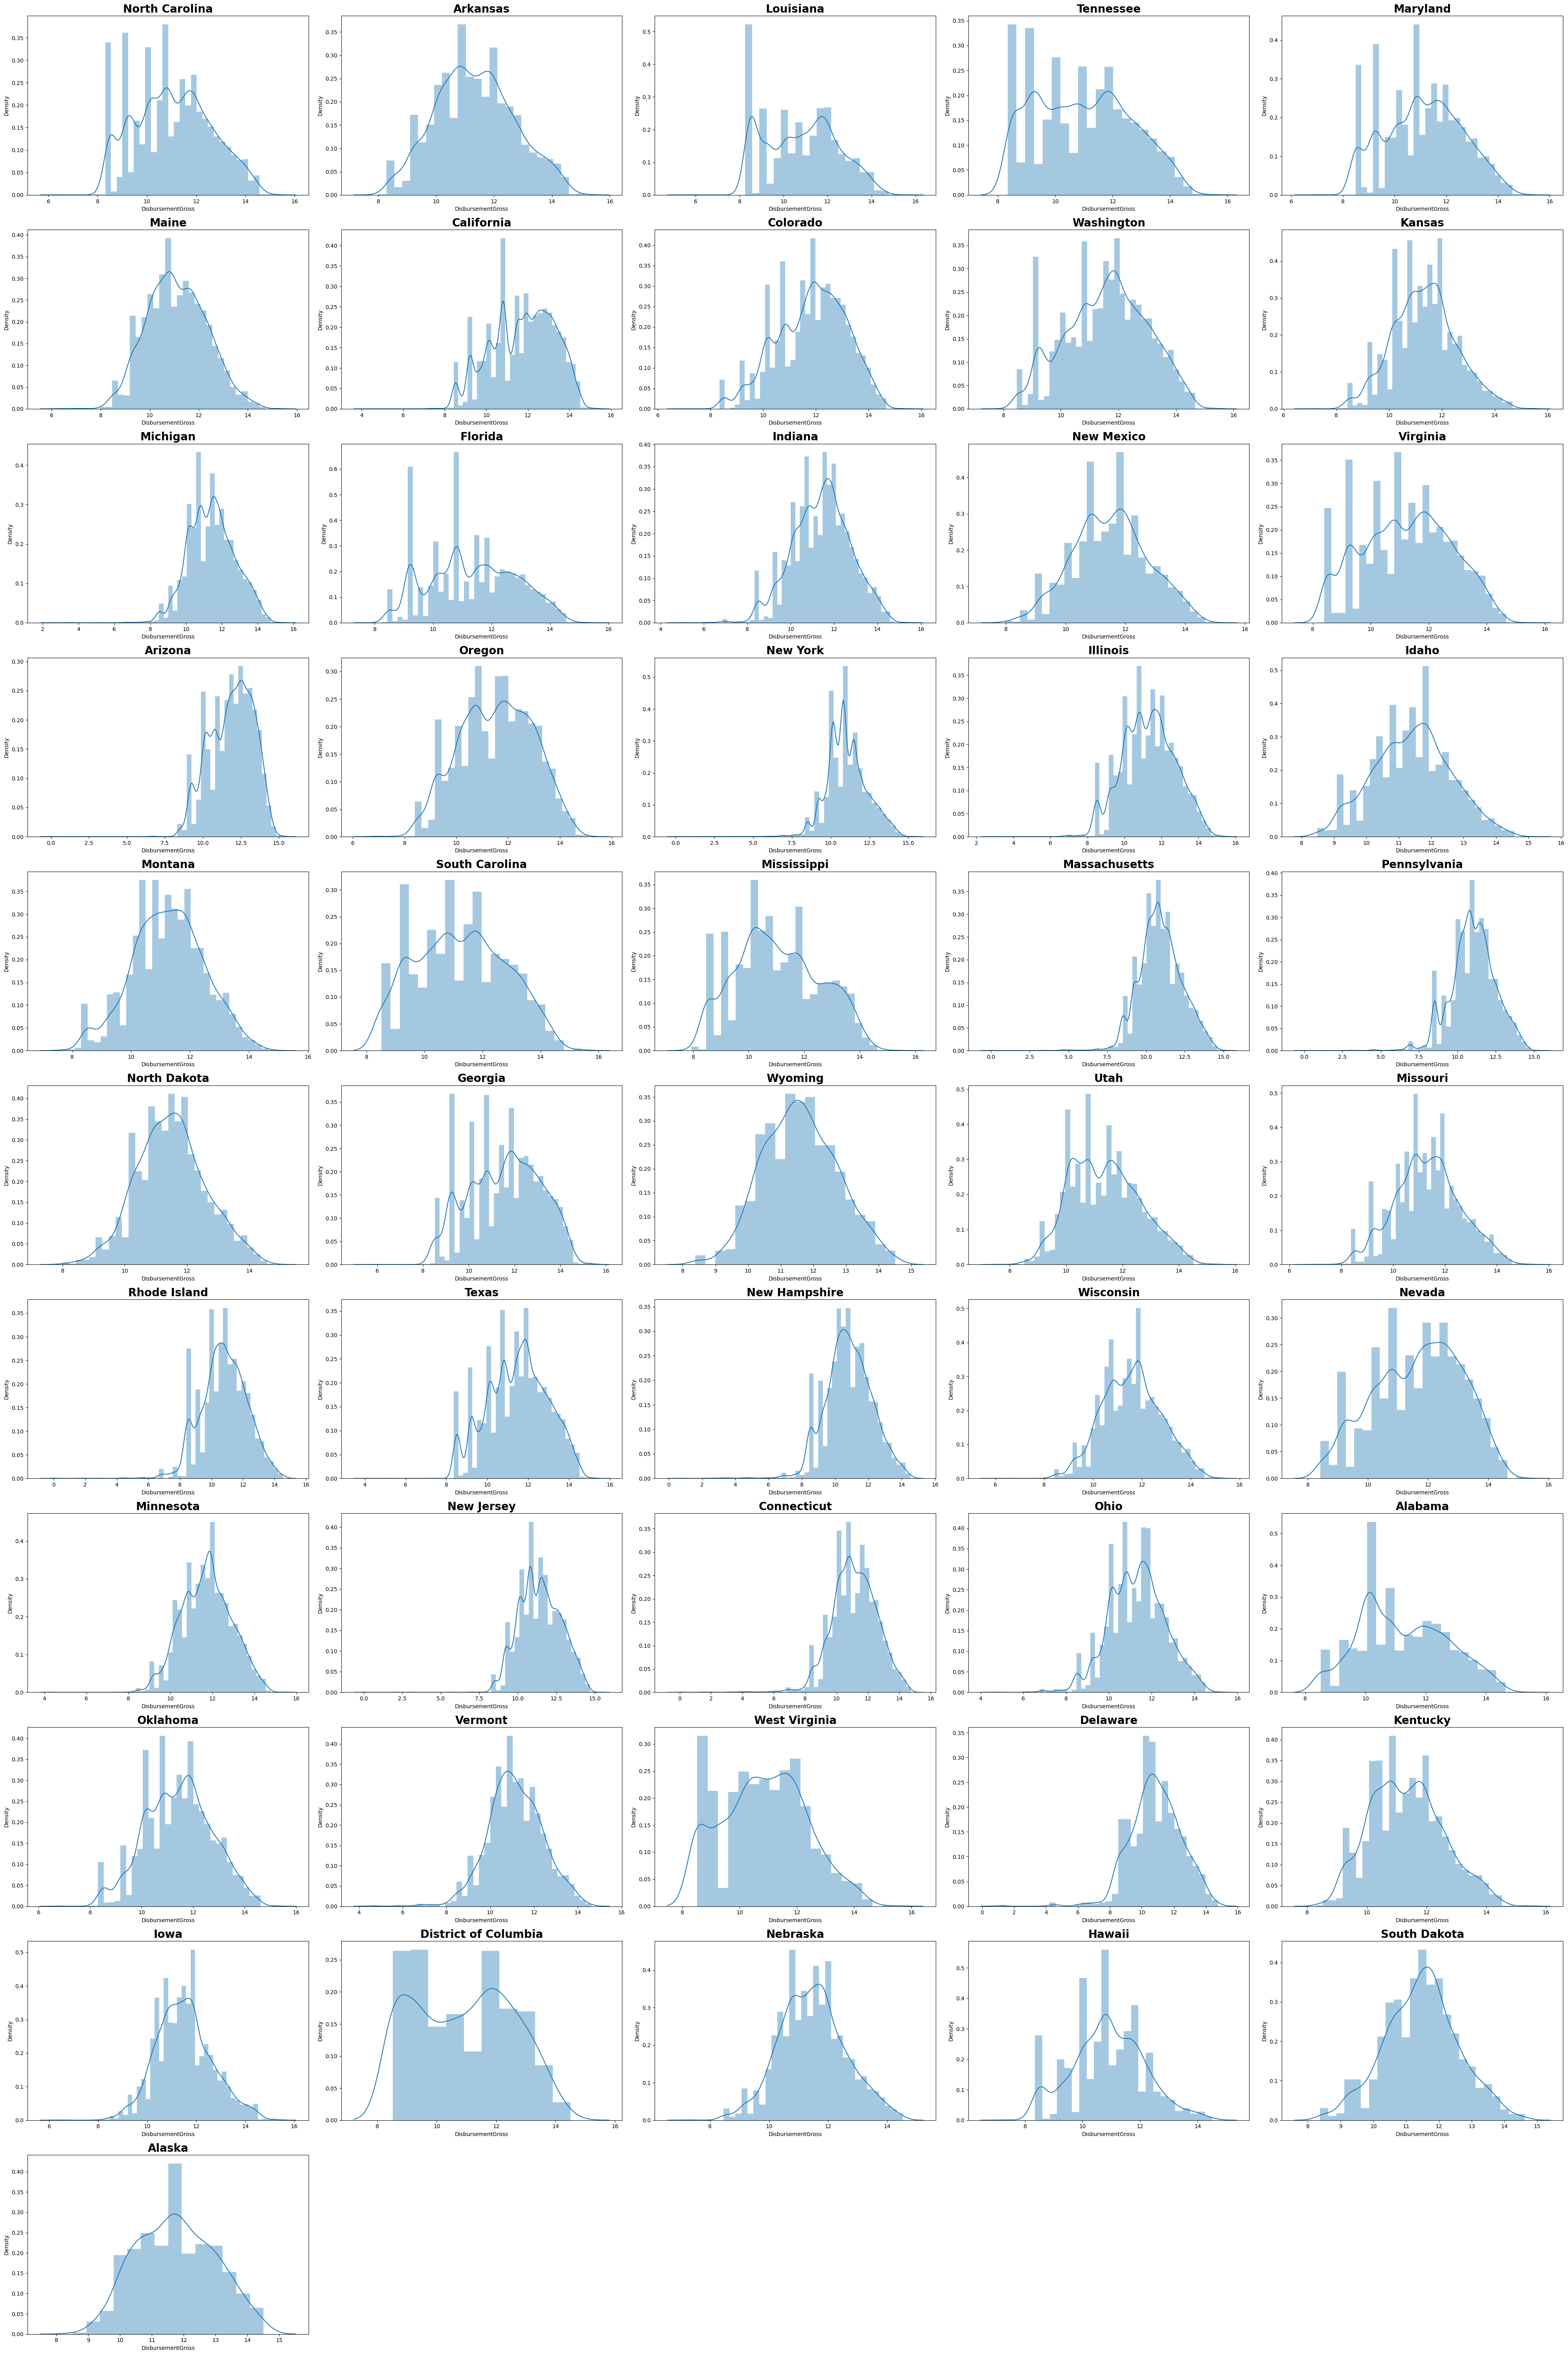

In [48]:
state_unique = list(dfc_v1['State'].unique())
plt.figure(figsize=(40,60))
i = 1
for item in state_unique :
    subs = dfc_v1[(dfc_v1['State'] == item) & (dfc_v1['DisbursementGross'] > 0)]['DisbursementGross']
    plt.subplot(11,5,i)
    sns.distplot(np.log(subs)) 
    plt.title(list(dfc_v1[dfc_v1['State'] == item]['StateName'])[0],fontweight='bold',fontsize=20) 
    i += 1 
plt.tight_layout()

## E. Feature Encoding

In [49]:
# One hot encoding NAICS & State
dfc_v1 = pd.get_dummies(dfc_v1, columns=['NAICS', 'StateName'], drop_first=True, dtype=int)

KeyError: "['NAICS'] not in index"

In [ ]:
dfc_v1.info()

In [ ]:
dfc_v1.head()

## F. Handle Class Imbalance (Oversampling)

In [ ]:
sns.countplot(x = dfc_v1['MIS_Status'])
dfc_v1['MIS_Status'].value_counts()

**Keterangan:** <br> 
1 = CHGOFF (Gagal Bayar) <br>
0 = P I F (Dibayar Penuh)

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = dfc_v1[(dfc_v1['MIS_Status']==0)] 
df_minority = dfc_v1[(dfc_v1['MIS_Status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 310034, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
sns.countplot(x = df_upsampled['MIS_Status'])
df_upsampled['MIS_Status'].value_counts()

# 2. Feature Engineering

## A. Feature Selection

In [50]:
df = dfc_v1.drop(['LoanNr_ChkDgt',
                      'State',
                      'Name',
                      'City',
                      'Zip',
                      'Bank',
                      'BankState',
                      'ApprovalDate',
                      'CreateJob',
                      'RetainedJob',
                      'RevLineCr',
                      'ChgOffDate',
                      'DisbursementDate',
                      'BalanceGross'], 
                     axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392142 entries, 12 to 898660
Data columns (total 82 columns):
 #   Column                                                                    Non-Null Count   Dtype  
---  ------                                                                    --------------   -----  
 0   ApprovalFY                                                                392142 non-null  int64  
 1   Term                                                                      392142 non-null  int64  
 2   NoEmp                                                                     392142 non-null  int64  
 3   NewExist                                                                  392142 non-null  int64  
 4   FranchiseCode                                                             392142 non-null  int64  
 5   UrbanRural                                                                392142 non-null  int64  
 6   LowDoc                                             

## B. Feature Extraction

### Feature 'RealEstate' 
- Kepemilikan properti (tanah), Hal ini dikarenakan nilai dari properti tersebut seringkali cukup besar untuk menutupi jumlah pokok yang masih belum dibayar, sehingga mengurangi kemungkinan terjadinya gagal bayar. pinjaman yang didukung oleh properti biasanya memiliki durasi 20 tahun atau lebih (240 bulan) dan merupakan satu-satunya pinjaman yang diberikan untuk jangka waktu yang begitu lama, sedangkan pinjaman yang tidak didukung  oleh properti biasanya memiliki durasi kurang dari 20 tahun (<240 bulan).  Oleh karena itu, membuat variabel dummy "RealEstate," di mana "RealEstate" = 1 jika "Term" (≥ 240 bulan) dan "RealEstate" = 0 jika "Term" < 240 bulan.

In [51]:
# Membuat feature baru berdasarkan column Term (Membuat Column RealEstate)
df['RealEstate'] = 0
df.loc[df['Term'] >= 240, 'RealEstate'] = 1

In [52]:
#cek kolom apakah sudah sesuai
re = df[['Term', 'RealEstate']]
re.sample(10)

,Term,RealEstate
501167,244,1
742025,300,1
587710,216,0
371181,120,0
762798,60,0
519151,60,0
179684,60,0
325823,60,0
221134,239,0
483822,98,0


### Feature "Recession"
- terdapat masa resesi terjadi sekitar tahun 2007 - 2009, sehingga membuat feature baru "Recession" berdasarkan feature "ApprovalFY", resesi = 1 (2007 - 2009), other = 0 (selain 2007 - 2009)

In [53]:
#Membuat feature baru 'Recession'
df['Recession'] = np.where((df['ApprovalFY'] >= 2007) & (df['ApprovalFY'] <= 2009), 1, 0)

In [54]:
#cek kolom apakah sudah sesuai
reces = df[['ApprovalFY', 'Recession']]
reces.sample(10)

,ApprovalFY,Recession
864846,2006,0
64046,2006,0
116013,2006,0
293623,2008,1
37397,2005,0
201975,2007,1
155091,2007,1
271279,2008,1
775824,2005,0
23942,2005,0


### Feature "Portion"
- Feature ini mendefinisikan persentase jumlah pinjaman yang di jamin oleh SBA (SBA_Appv) terhadap Bank (GrAppv)

In [55]:
#membuat column "portion"
df['Portion'] = df['SBA_Appv'] / df['GrAppv']

In [56]:
df[['SBA_Appv','GrAppv', 'Portion']]

,SBA_Appv,GrAppv,Portion
12,190050.0,253400.0,0.75
24,116705.0,137300.0,0.85
32,42500.0,50000.0,0.85
38,17000.0,20000.0,0.85
49,8500.0,10000.0,0.85
...,...,...,...
894806,127500.0,170000.0,0.75
894809,509000.0,509000.0,1.00
894832,1038000.0,1038000.0,1.00
896082,127500.0,170000.0,0.75


### Feature "Ratio_CHGOFF"
- Feature ini mendefinisikan rasio persentase jumlah gagal bayar (ChgOffPrinGr) terhadap jumlah yang dicairkan (DisbursementGross)

In [57]:
#membuat column "Ratio_CHGOFF"
df['Ratio_CHGOFF'] = round (df['ChgOffPrinGr'] / df['DisbursementGross'], 2)

In [58]:
df[['ChgOffPrinGr','DisbursementGross', 'Ratio_CHGOFF']].sample(10)

,ChgOffPrinGr,DisbursementGross,Ratio_CHGOFF
810431,0.0,804000.0,0.0
219375,0.0,50000.0,0.0
42394,40080.0,100000.0,0.4
525623,0.0,10000.0,0.0
642175,0.0,15000.0,0.0
630693,0.0,825000.0,0.0
527859,0.0,350000.0,0.0
113438,0.0,1000000.0,0.0
18585,0.0,25000.0,0.0
551930,0.0,70000.0,0.0


In [59]:
#Melakukan feature selection kembali
df_fix = df.drop(['Ratio_CHGOFF',
              'ChgOffPrinGr',
              'ApprovalFY'], 
                     axis=1)
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392142 entries, 12 to 898660
Data columns (total 83 columns):
 #   Column                                                                    Non-Null Count   Dtype  
---  ------                                                                    --------------   -----  
 0   Term                                                                      392142 non-null  int64  
 1   NoEmp                                                                     392142 non-null  int64  
 2   NewExist                                                                  392142 non-null  int64  
 3   FranchiseCode                                                             392142 non-null  int64  
 4   UrbanRural                                                                392142 non-null  int64  
 5   LowDoc                                                                    392142 non-null  int64  
 6   DisbursementGross                                  

## C. New Feature

1. Menambah feature **Default_Rate_Industry** dari masing masing **sektor industri**.
2. Menambah feature **Default_Rate_State** dari masing masing **State**.
3. Membagi feature **State** menjadi **Region** untuk mengurangi jumlah kolom dan ke-efektifitisan dalam pemodelan.
4. Menambah Feature **Income**, Semakin tinggi pendapatan (income) perusahaan, semakin tinggi kemungkinan perusahaan dapat membayar pinjaman dengan sukses.
5. Menambah Feature **Score_Credit**, hal ini berguna untuk menilai kelayakan kredit dan kemampuan perusahaan untuk membayar kembali pinjaman.